Accuracy: 0.9856502242152466

Classification Report:

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.91      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



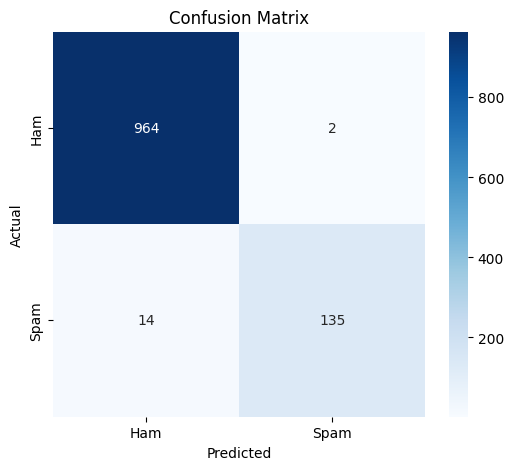


TN: 964
FP: 2
FN: 14
TP: 135

Message: Congratulations! You won a free car!!!
Prediction: Ham

Message: Hey, call me when you reach home.
Prediction: Ham


In [1]:
# ============================================
# EXPERIMENT 6 — SPAM DETECTION USING ML
# Models allowed: Naive Bayes, KNN, SVM
# Required Outputs: Accuracy, Classification Report, Confusion Matrix, TP/TN/FP/FN, Prediction
# ============================================

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder


# -----------------------------
# 1. Load dataset with correct encoding
# -----------------------------
df = pd.read_csv("spam.csv", encoding="latin1")

# Keep only needed columns
df = df[['v1', 'v2']]
df.columns = ['label', 'text']


# -----------------------------
# 2. Clean text
# -----------------------------
def clean_text(t):
    t = str(t).lower()
    t = re.sub(r'http\S+',' ',t)
    t = re.sub(r'[^a-z\s]',' ',t)
    t = re.sub(r'\s+',' ',t).strip()
    return t

df['cleaned'] = df['text'].apply(clean_text)


# -----------------------------
# 3. Encode labels
# spam = 1, ham = 0
# -----------------------------
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])


# -----------------------------
# 4. Split dataset
# -----------------------------
X = df['cleaned']
y = df['label_encoded']

tfidf = TfidfVectorizer(max_features=3000)
X_vect = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.2, random_state=42, stratify=y
)


# -----------------------------
# 5. Choose one model (exam will tell)
# UNCOMMENT one model only
# -----------------------------

# model = MultinomialNB()               # Naive Bayes
# model = KNeighborsClassifier(n_neighbors=5)   # KNN
model = LinearSVC()                     # SVM (BEST)
model = LogisticRegression(max_iter=1000)


# -----------------------------
# 6. Train model
# -----------------------------
model.fit(X_train, y_train)


# -----------------------------
# 7. Accuracy
# -----------------------------
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


# -----------------------------
# 8. Classification Report
# -----------------------------
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))


# -----------------------------
# 9. Confusion Matrix + TP/TN/FP/FN
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
labels = ['Ham', 'Spam']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

TN, FP, FN, TP = cm.ravel()

print("\nTN:", TN)
print("FP:", FP)
print("FN:", FN)
print("TP:", TP)


# -----------------------------
# 10. New sentence prediction
# -----------------------------
def predict_message(msg):
    clean = clean_text(msg)
    vect = tfidf.transform([clean])
    pred = model.predict(vect)[0]
    print("\nMessage:", msg)
    print("Prediction:", "Spam" if pred==1 else "Ham")

predict_message("Congratulations! You won a free car!!!")
predict_message("Hey, call me when you reach home.")


C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


TRAINING Simple RNN
Epoch 1/3
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.8656 - loss: 0.4024 - val_accuracy: 0.8430 - val_loss: 0.4399
Epoch 2/3
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8715 - loss: 0.3918 - val_accuracy: 0.8430 - val_loss: 0.4370
Epoch 3/3
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8715 - loss: 0.3928 - val_accuracy: 0.8430 - val_loss: 0.4435


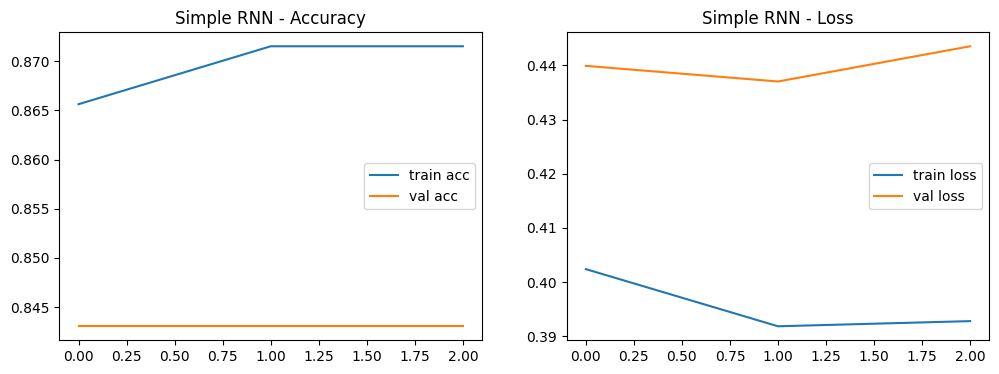

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

Accuracy: 0.8663677130044843

Classification Report:

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       966
        spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

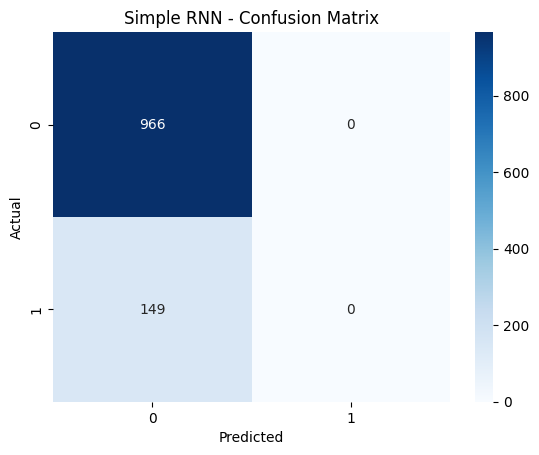


TN: 966
FP: 0
FN: 149
TP: 0
TRAINING LSTM
Epoch 1/3


C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.8715 - loss: 0.4087 - val_accuracy: 0.8430 - val_loss: 0.4375
Epoch 2/3
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.8715 - loss: 0.3894 - val_accuracy: 0.8430 - val_loss: 0.4472
Epoch 3/3
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.8715 - loss: 0.3868 - val_accuracy: 0.8430 - val_loss: 0.4434


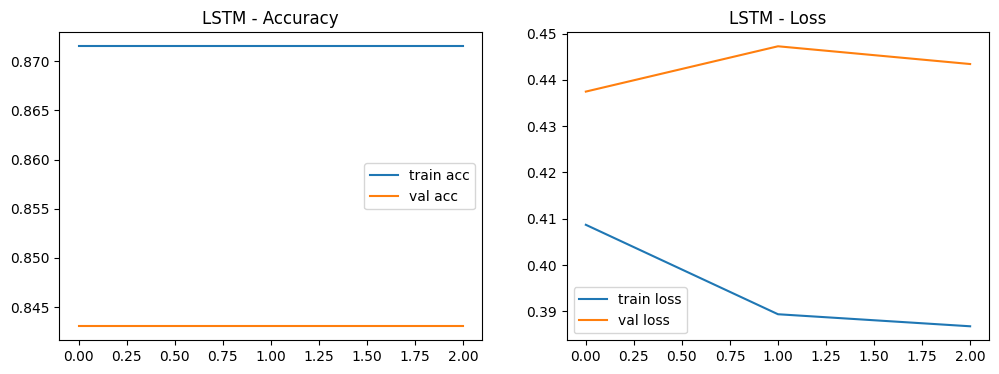

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step

Accuracy: 0.8663677130044843

Classification Report:

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       966
        spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

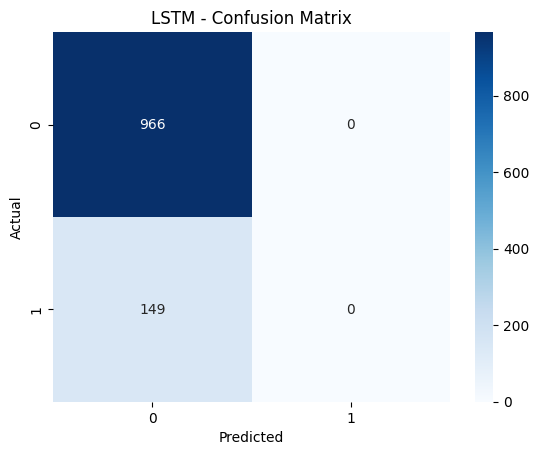


TN: 966
FP: 0
FN: 149
TP: 0
TRAINING BiLSTM
Epoch 1/3


C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.9035 - loss: 0.2754 - val_accuracy: 0.9585 - val_loss: 0.1329
Epoch 2/3
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9823 - loss: 0.0656 - val_accuracy: 0.9843 - val_loss: 0.0599
Epoch 3/3
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9919 - loss: 0.0322 - val_accuracy: 0.9843 - val_loss: 0.0571


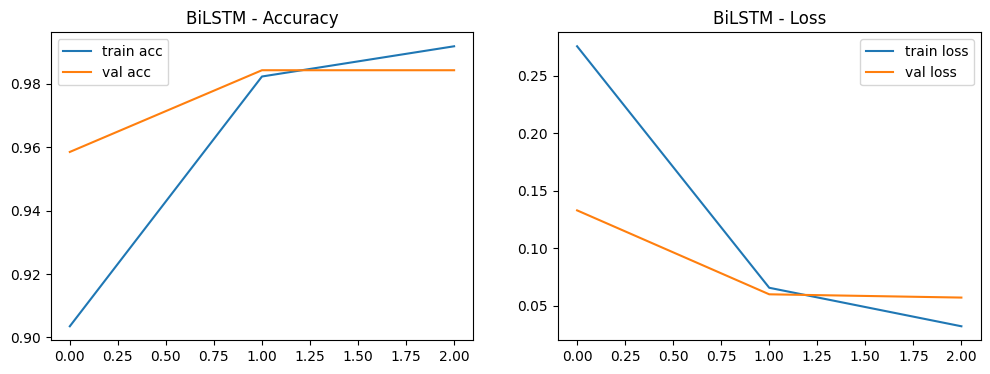

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step

Accuracy: 0.9820627802690582

Classification Report:

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.94      0.93      0.93       149

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



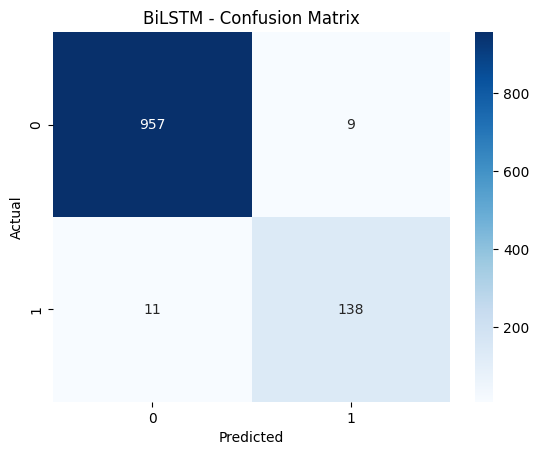


TN: 957
FP: 9
FN: 11
TP: 138
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

[LSTM]  Message: You won $1000 cash!!!
Prediction: Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step

[LSTM]  Message: Call me after class
Prediction: Ham


In [2]:
# ==========================================================
# NLP LAB INTERNAL
# SPAM DETECTION USING:
# 1. SIMPLE RNN
# 2. LSTM
# 3. BiLSTM
# ==========================================================

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# ==========================================================
# 1. LOAD & CLEAN DATASET
# ==========================================================
df = pd.read_csv("spam.csv", encoding="latin1")
df = df[['v1','v2']]
df.columns = ['label','text']

def clean_text(t):
    t = str(t).lower()
    t = re.sub(r'[^a-z\s]', ' ', t)
    t = re.sub(r'\s+',' ', t).strip()
    return t

df['cleaned'] = df['text'].apply(clean_text)

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])   # ham=0, spam=1


# ==========================================================
# 2. TOKENIZE & PAD SEQUENCES
# ==========================================================
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned'])

seq = tokenizer.texts_to_sequences(df['cleaned'])
padded = pad_sequences(seq, maxlen=100, padding='post')

X = padded
y = df['label_encoded']


# ==========================================================
# 3. TRAIN-TEST SPLIT
# ==========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# ==========================================================
# 4. FUNCTION TO TRAIN & EVALUATE ANY MODEL
# ==========================================================
def train_and_evaluate(model, model_name):

    print(f"TRAINING {model_name}")

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=3,
        batch_size=32,
        verbose=1
    )

    # PLOTS
    plt.figure(figsize=(12,4))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title(f"{model_name} - Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(f"{model_name} - Loss")
    plt.legend()

    plt.show()

    # PREDICTION
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

    # METRICS
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred, target_names=['ham','spam']))

    # CONFUSION MATRIX
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    TN, FP, FN, TP = cm.ravel()
    print("\nTN:", TN)
    print("FP:", FP)
    print("FN:", FN)
    print("TP:", TP)

    return model


# ==========================================================
# 5. MODEL 1 — SIMPLE RNN
# ==========================================================
rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=100),
    SimpleRNN(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

trained_rnn = train_and_evaluate(rnn_model, "Simple RNN")


# ==========================================================
# 6. MODEL 2 — LSTM
# ==========================================================
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=100),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

trained_lstm = train_and_evaluate(lstm_model, "LSTM")


# ==========================================================
# 7. MODEL 3 — BiLSTM
# ==========================================================
bilstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=100),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

trained_bilstm = train_and_evaluate(bilstm_model, "BiLSTM")


# ==========================================================
# 8. NEW SENTENCE PREDICTION (USE ANY MODEL)
# ==========================================================
def predict_message(msg, model, model_name):
    clean = clean_text(msg)
    seq = tokenizer.texts_to_sequences([clean])
    pad = pad_sequences(seq, maxlen=100)
    pred = (model.predict(pad)[0][0] >= 0.5)
    print(f"\n[{model_name}]  Message:", msg)
    print("Prediction:", "Spam" if pred else "Ham")


# EXAMPLES
predict_message("You won $1000 cash!!!", trained_lstm, "LSTM")
predict_message("Call me after class", trained_lstm, "LSTM")


                                                text sentiment
0                I`d have responded, if I were going   neutral
1      Sooo SAD I will miss you here in San Diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   Sons of ****, why couldn`t they put them on t...  negative
Classes → ['negative' 'neutral' 'positive']

TRAINING RNN
Epoch 1/3


C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


550/550 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.3986 - loss: 1.0912 - val_accuracy: 0.4078 - val_loss: 1.0843
Epoch 2/3
550/550 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.3813 - loss: 1.1041 - val_accuracy: 0.4073 - val_loss: 1.0855
Epoch 3/3
550/550 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.4009 - loss: 1.0893 - val_accuracy: 0.4073 - val_loss: 1.0858


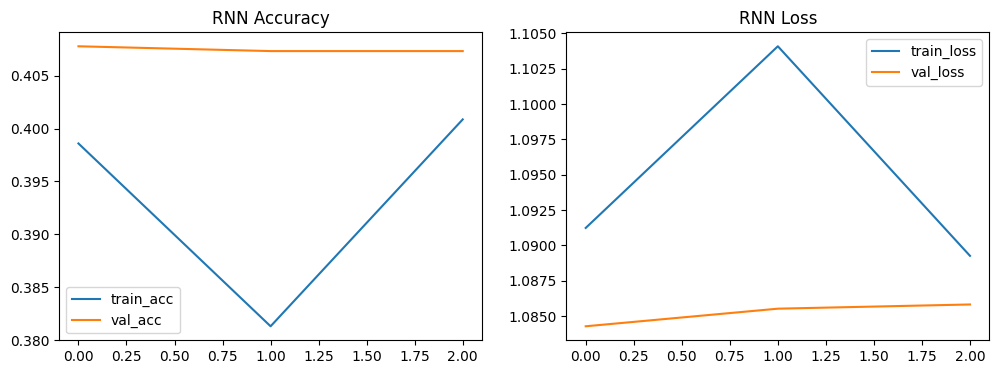

172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step

Accuracy: 0.40458431871930145

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1556
     neutral       0.40      1.00      0.58      2224
    positive       0.00      0.00      0.00      1717

    accuracy                           0.40      5497
   macro avg       0.13      0.33      0.19      5497
weighted avg       0.16      0.40      0.23      5497



C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

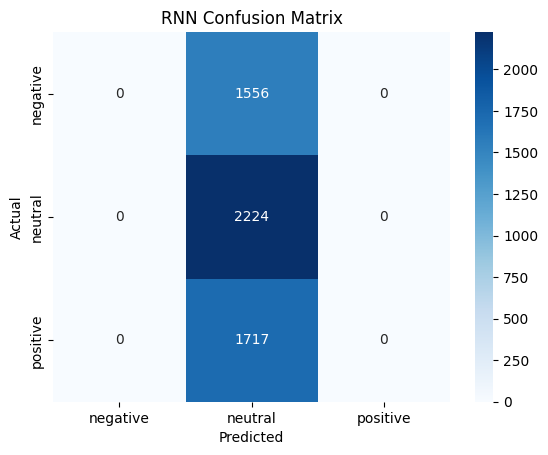


TP, FP, FN, TN per class:

Class: negative
TP: 0 FP: 0 FN: 1556 TN: 3941

Class: neutral
TP: 2224 FP: 3273 FN: 0 TN: 0

Class: positive
TP: 0 FP: 0 FN: 1717 TN: 3780

TRAINING LSTM
Epoch 1/3


C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


550/550 ━━━━━━━━━━━━━━━━━━━━ 54s 88ms/step - accuracy: 0.4024 - loss: 1.0887 - val_accuracy: 0.4073 - val_loss: 1.0876
Epoch 2/3
550/550 ━━━━━━━━━━━━━━━━━━━━ 47s 85ms/step - accuracy: 0.4039 - loss: 1.0880 - val_accuracy: 0.4073 - val_loss: 1.0880
Epoch 3/3
550/550 ━━━━━━━━━━━━━━━━━━━━ 47s 86ms/step - accuracy: 0.4039 - loss: 1.0880 - val_accuracy: 0.4073 - val_loss: 1.0868


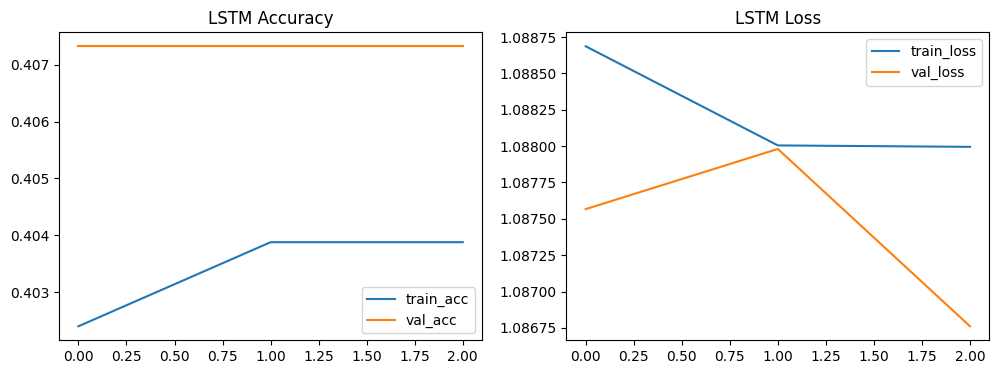

172/172 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step

Accuracy: 0.40458431871930145

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1556
     neutral       0.40      1.00      0.58      2224
    positive       0.00      0.00      0.00      1717

    accuracy                           0.40      5497
   macro avg       0.13      0.33      0.19      5497
weighted avg       0.16      0.40      0.23      5497



C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

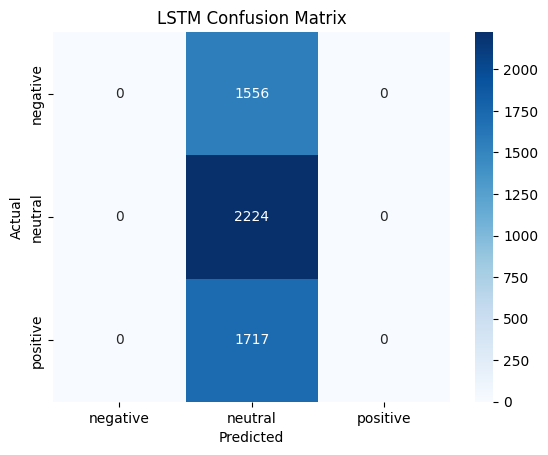


TP, FP, FN, TN per class:

Class: negative
TP: 0 FP: 0 FN: 1556 TN: 3941

Class: neutral
TP: 2224 FP: 3273 FN: 0 TN: 0

Class: positive
TP: 0 FP: 0 FN: 1717 TN: 3780

TRAINING BiLSTM
Epoch 1/3


C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


550/550 ━━━━━━━━━━━━━━━━━━━━ 61s 91ms/step - accuracy: 0.5841 - loss: 0.8749 - val_accuracy: 0.6830 - val_loss: 0.7366
Epoch 2/3
550/550 ━━━━━━━━━━━━━━━━━━━━ 49s 89ms/step - accuracy: 0.7429 - loss: 0.6244 - val_accuracy: 0.6971 - val_loss: 0.7069
Epoch 3/3
550/550 ━━━━━━━━━━━━━━━━━━━━ 50s 90ms/step - accuracy: 0.8026 - loss: 0.5100 - val_accuracy: 0.6925 - val_loss: 0.7438


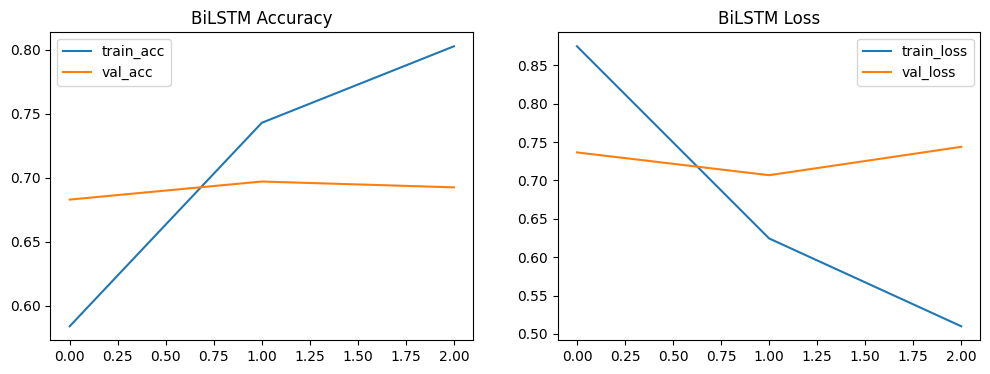

172/172 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step

Accuracy: 0.6981990176459887

Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.70      0.69      1556
     neutral       0.65      0.69      0.67      2224
    positive       0.80      0.70      0.75      1717

    accuracy                           0.70      5497
   macro avg       0.71      0.70      0.70      5497
weighted avg       0.70      0.70      0.70      5497



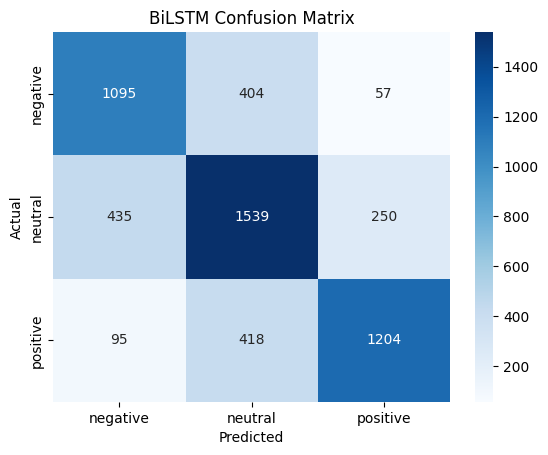


TP, FP, FN, TN per class:

Class: negative
TP: 1095 FP: 530 FN: 461 TN: 3411

Class: neutral
TP: 1539 FP: 822 FN: 685 TN: 2451

Class: positive
TP: 1204 FP: 307 FN: 513 TN: 3473
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step

[LSTM]
Text: I love this product!
Predicted Sentiment: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step

[BiLSTM]
Text: This is horrible!
Predicted Sentiment: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step

[RNN]
Text: Okay, nothing special
Predicted Sentiment: neutral


In [5]:
# ====================================================================
# SENTIMENT ANALYSIS USING RNN, LSTM & BiLSTM (3 Class: pos/neg/neu)
# Dataset columns: textID, text, selected_text, sentiment
# ====================================================================

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ====================================================================
# 1. LOAD DATASET (YOUR FORMAT)
# ====================================================================
df = pd.read_csv("Tweets_Data.csv")  # change name if needed

# Keep only needed columns
df = df[['text', 'sentiment']]

print(df.head())


# ====================================================================
# 2. CLEAN TEXT
# ====================================================================
def clean_text(t):
    t = str(t).lower()
    t = re.sub(r'[^a-z\s]', ' ', t)
    t = re.sub(r'\s+', ' ', t).strip()
    return t

df['cleaned'] = df['text'].apply(clean_text)


# ====================================================================
# 3. LABEL ENCODING (positive, negative, neutral)
# ====================================================================
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])
print("Classes →", le.classes_)
num_classes = len(le.classes_)


# ====================================================================
# 4. TOKENIZER + PADDING
# ====================================================================
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned'])

seq = tokenizer.texts_to_sequences(df['cleaned'])
padded = pad_sequences(seq, maxlen=100, padding='post')

X = padded
y = df['label'].values


# ====================================================================
# 5. TRAIN–TEST SPLIT
# ====================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# ====================================================================
# 6. TRAINING FUNCTION
# ====================================================================
def train_model(model, model_name):

    print(f"\n==============================")
    print(f"TRAINING {model_name}")
    print("==============================")

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=3,
        batch_size=32,
        verbose=1
    )

    # ------------ GRAPHS --------------
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label="train_acc")
    plt.plot(history.history['val_accuracy'], label="val_acc")
    plt.title(f"{model_name} Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label="train_loss")
    plt.plot(history.history['val_loss'], label="val_loss")
    plt.title(f"{model_name} Loss")
    plt.legend()

    plt.show()

    # ------------ PREDICTION --------------
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Metrics
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # TP, FP, FN, TN per class
    print("\nTP, FP, FN, TN per class:")
    for i, cls in enumerate(le.classes_):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)
        print(f"\nClass: {cls}")
        print("TP:", TP, "FP:", FP, "FN:", FN, "TN:", TN)

    return model


# ====================================================================
# 7. MODEL 1 — RNN
# ====================================================================
rnn_model = Sequential([
    Embedding(10000, 32, input_length=100),
    SimpleRNN(64),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

trained_rnn = train_model(rnn_model, "RNN")


# ====================================================================
# 8. MODEL 2 — LSTM
# ====================================================================
lstm_model = Sequential([
    Embedding(10000, 32, input_length=100),
    LSTM(64),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

trained_lstm = train_model(lstm_model, "LSTM")


# ====================================================================
# 9. MODEL 3 — BiLSTM
# ====================================================================
bilstm_model = Sequential([
    Embedding(10000, 32, input_length=100),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

trained_bilstm = train_model(bilstm_model, "BiLSTM")


# ====================================================================
# 10. NEW SENTENCE PREDICTION
# ====================================================================
def predict_sentiment(text, model, model_name):
    clean = clean_text(text)
    seq = tokenizer.texts_to_sequences([clean])
    pad = pad_sequences(seq, maxlen=100)
    pred_class = np.argmax(model.predict(pad))
    print(f"\n[{model_name}]")
    print("Text:", text)
    print("Predicted Sentiment:", le.inverse_transform([pred_class])[0])


# EXAMPLE PREDICTIONS
predict_sentiment("I love this product!", trained_lstm, "LSTM")
predict_sentiment("This is horrible!", trained_bilstm, "BiLSTM")
predict_sentiment("Okay, nothing special", trained_rnn, "RNN")


                                                text       category
0  Kanye West's 'Erratic' Medication Dosage Repor...  Entertainment
1  Regina King Reveals Her Plan To Push Diversity...  Entertainment
2  A 13-Year-Old Girl Was Largely Responsible For...  Entertainment
3  YouTuber Jake Paul Charged With Trespassing In...  Entertainment
4  A Woman Proposed To Her Girlfriend During Ryan...  Entertainment

Categories: ['Entertainment' 'Parenting' 'Politics' 'Style & Beauty' 'Travel'
 'Wellness']

Training: RNN
Epoch 1/3


C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1055/1055 ━━━━━━━━━━━━━━━━━━━━ 76s 66ms/step - accuracy: 0.1678 - loss: 1.8965 - val_accuracy: 0.1664 - val_loss: 1.8100
Epoch 2/3
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 67s 64ms/step - accuracy: 0.1679 - loss: 1.8263 - val_accuracy: 0.1736 - val_loss: 1.7975
Epoch 3/3
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 67s 64ms/step - accuracy: 0.1716 - loss: 1.8101 - val_accuracy: 0.1672 - val_loss: 1.8222


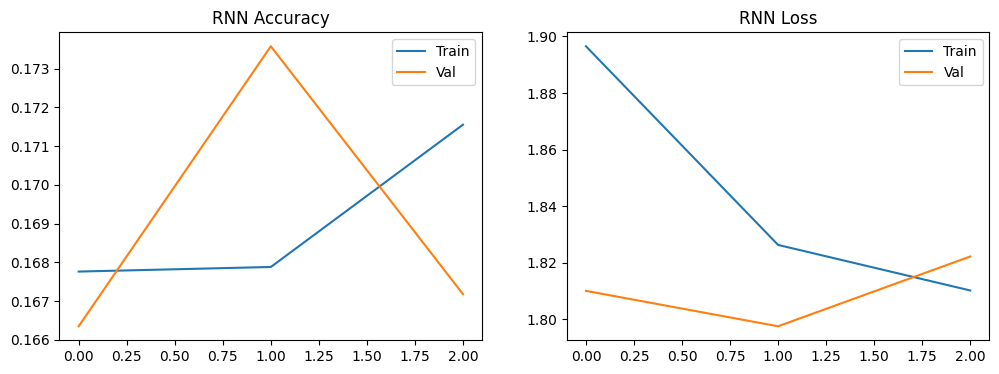

330/330 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step

Accuracy: 0.16246445497630332

Classification Report:
                precision    recall  f1-score   support

 Entertainment       0.16      0.40      0.23      1758
     Parenting       0.00      0.00      0.00      1758
      Politics       0.00      0.00      0.00      1758
Style & Beauty       0.00      0.00      0.00      1759
        Travel       0.16      0.57      0.25      1759
      Wellness       0.00      0.00      0.00      1758

      accuracy                           0.16     10550
     macro avg       0.05      0.16      0.08     10550
  weighted avg       0.05      0.16      0.08     10550



C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

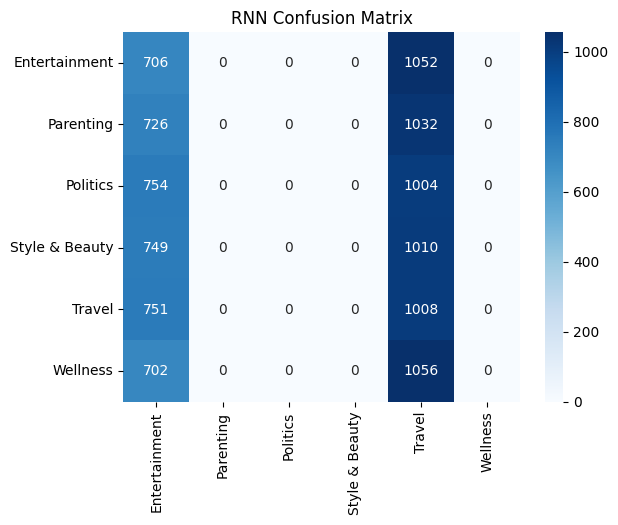


--- TP, FP, FN, TN per class ---

Class: Entertainment
TP: 706 FP: 3682 FN: 1052 TN: 5110

Class: Parenting
TP: 0 FP: 0 FN: 1758 TN: 8792

Class: Politics
TP: 0 FP: 0 FN: 1758 TN: 8792

Class: Style & Beauty
TP: 0 FP: 0 FN: 1759 TN: 8791

Class: Travel
TP: 1008 FP: 5154 FN: 751 TN: 3637

Class: Wellness
TP: 0 FP: 0 FN: 1758 TN: 8792

Training: LSTM
Epoch 1/3


C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1055/1055 ━━━━━━━━━━━━━━━━━━━━ 334s 310ms/step - accuracy: 0.1620 - loss: 1.7929 - val_accuracy: 0.1640 - val_loss: 1.7925
Epoch 2/3
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 173s 164ms/step - accuracy: 0.1690 - loss: 1.7924 - val_accuracy: 0.1677 - val_loss: 1.7920
Epoch 3/3
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 175s 166ms/step - accuracy: 0.1672 - loss: 1.7924 - val_accuracy: 0.1591 - val_loss: 1.7926


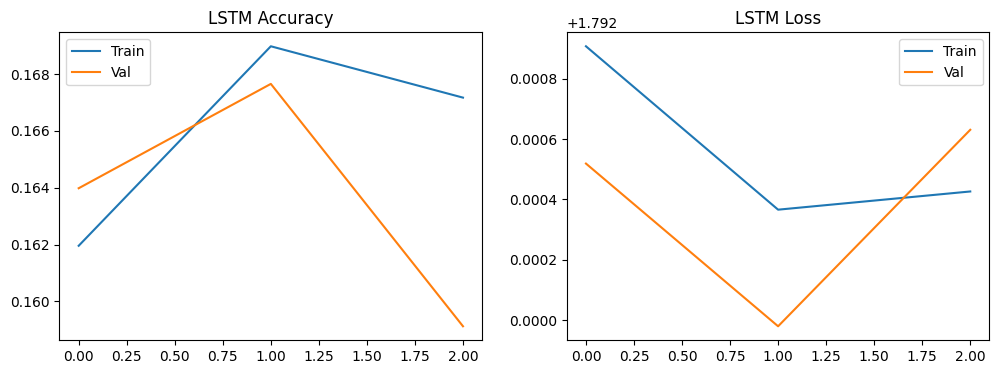

330/330 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step

Accuracy: 0.16663507109004738

Classification Report:
                precision    recall  f1-score   support

 Entertainment       0.00      0.00      0.00      1758
     Parenting       0.17      1.00      0.29      1758
      Politics       0.00      0.00      0.00      1758
Style & Beauty       0.00      0.00      0.00      1759
        Travel       0.00      0.00      0.00      1759
      Wellness       0.00      0.00      0.00      1758

      accuracy                           0.17     10550
     macro avg       0.03      0.17      0.05     10550
  weighted avg       0.03      0.17      0.05     10550



C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

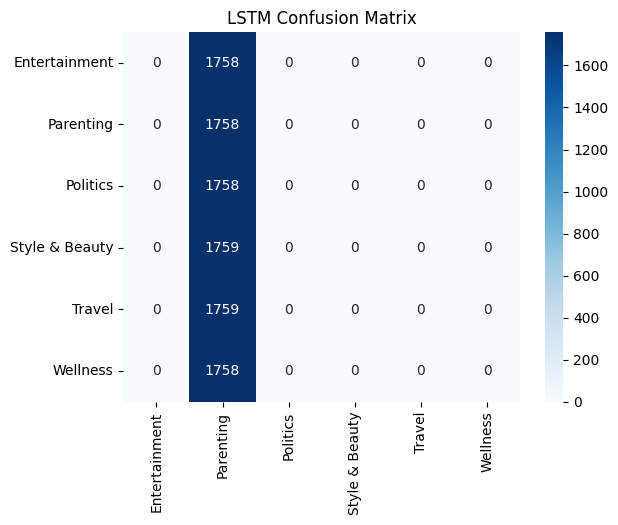


--- TP, FP, FN, TN per class ---

Class: Entertainment
TP: 0 FP: 0 FN: 1758 TN: 8792

Class: Parenting
TP: 1758 FP: 8792 FN: 0 TN: 0

Class: Politics
TP: 0 FP: 0 FN: 1758 TN: 8792

Class: Style & Beauty
TP: 0 FP: 0 FN: 1759 TN: 8791

Class: Travel
TP: 0 FP: 0 FN: 1759 TN: 8791

Class: Wellness
TP: 0 FP: 0 FN: 1758 TN: 8792

Training: BiLSTM
Epoch 1/3


C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1055/1055 ━━━━━━━━━━━━━━━━━━━━ 193s 174ms/step - accuracy: 0.6941 - loss: 0.8493 - val_accuracy: 0.8269 - val_loss: 0.5290
Epoch 2/3
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 182s 172ms/step - accuracy: 0.8785 - loss: 0.3798 - val_accuracy: 0.8327 - val_loss: 0.5046
Epoch 3/3
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 181s 171ms/step - accuracy: 0.9206 - loss: 0.2543 - val_accuracy: 0.8236 - val_loss: 0.5646


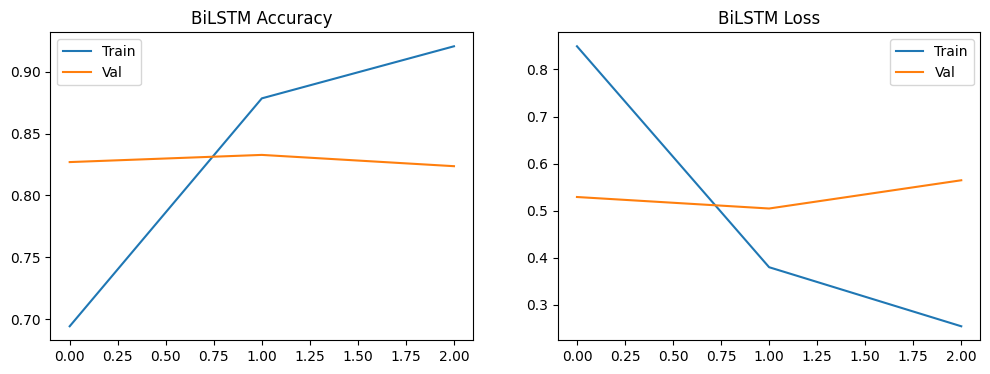

330/330 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step

Accuracy: 0.8186729857819905

Classification Report:
                precision    recall  f1-score   support

 Entertainment       0.79      0.82      0.81      1758
     Parenting       0.77      0.80      0.78      1758
      Politics       0.83      0.88      0.85      1758
Style & Beauty       0.90      0.82      0.86      1759
        Travel       0.89      0.82      0.85      1759
      Wellness       0.75      0.78      0.77      1758

      accuracy                           0.82     10550
     macro avg       0.82      0.82      0.82     10550
  weighted avg       0.82      0.82      0.82     10550



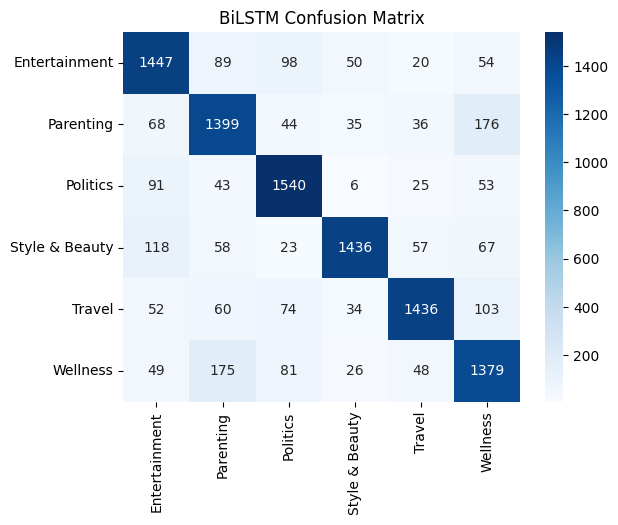


--- TP, FP, FN, TN per class ---

Class: Entertainment
TP: 1447 FP: 378 FN: 311 TN: 8414

Class: Parenting
TP: 1399 FP: 425 FN: 359 TN: 8367

Class: Politics
TP: 1540 FP: 320 FN: 218 TN: 8472

Class: Style & Beauty
TP: 1436 FP: 151 FN: 323 TN: 8640

Class: Travel
TP: 1436 FP: 186 FN: 323 TN: 8605

Class: Wellness
TP: 1379 FP: 453 FN: 379 TN: 8339
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

[LSTM]
Headline: Government proposes new tax policy
Predicted Category: Entertainment
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

[BiLSTM]
Headline: Actor wins award for best performance
Predicted Category: Travel
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

[RNN]
Headline: New smartphone model launched
Predicted Category: Travel


In [8]:
# ================================================================
# NEWS CATEGORY CLASSIFICATION (Multi-Class)
# Using RNN, LSTM, BiLSTM
# Dataset Columns: headline, category, short_description, authors, date
# ================================================================

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# ================================================================
# 1. LOAD DATASET
# ================================================================
df = pd.read_csv("news_balanced_categories11.csv")  # change filename

# Keep only headline and category
df = df[['headline', 'category']]

df.columns = ['text', 'category']
print(df.head())


# ================================================================
# 2. CLEAN TEXT
# ================================================================
def clean_text(t):
    t = str(t).lower()
    t = re.sub(r'[^a-z\s]', ' ', t)
    t = re.sub(r'\s+', ' ', t).strip()
    return t

df['cleaned'] = df['text'].apply(clean_text)


# ================================================================
# 3. LABEL ENCODING
# ================================================================
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['category'])
num_classes = len(le.classes_)
print("\nCategories:", le.classes_)


# ================================================================
# 4. TOKENIZATION & PADDING
# ================================================================
tokenizer = Tokenizer(num_words=15000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned'])

seq = tokenizer.texts_to_sequences(df['cleaned'])
padded = pad_sequences(seq, maxlen=120, padding='post')

X = padded
y = df['label_encoded']


# ================================================================
# 5. TRAIN–TEST SPLIT
# ================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# ================================================================
# 6. TRAINING FUNCTION (COMMON)
# ================================================================
def train_model(model, name):

    print(f"\n==============================")
    print(f"Training: {name}")
    print("==============================")

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )

    history = model.fit(
        X_train, y_train,
        epochs=3,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Graphs
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f"{name} Accuracy")
    plt.legend(['Train', 'Val'])

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f"{name} Loss")
    plt.legend(['Train', 'Val'])

    plt.show()

    # Evaluation
    y_pred_p = model.predict(X_test)
    y_pred = np.argmax(y_pred_p, axis=1)

    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # TP, FP, FN, TN per class
    print("\n--- TP, FP, FN, TN per class ---")
    for i, cls in enumerate(le.classes_):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)
        print(f"\nClass: {cls}")
        print("TP:", TP, "FP:", FP, "FN:", FN, "TN:", TN)

    return model


# ================================================================
# 7. MODEL 1 — RNN
# ================================================================
rnn_model = Sequential([
    Embedding(15000, 64, input_length=120),
    SimpleRNN(128),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

trained_rnn = train_model(rnn_model, "RNN")


# ================================================================
# 8. MODEL 2 — LSTM
# ================================================================
lstm_model = Sequential([
    Embedding(15000, 64, input_length=120),
    LSTM(128),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

trained_lstm = train_model(lstm_model, "LSTM")


# ================================================================
# 9. MODEL 3 — BiLSTM
# ================================================================
bilstm_model = Sequential([
    Embedding(15000, 64, input_length=120),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

trained_bilstm = train_model(bilstm_model, "BiLSTM")


# ================================================================
# 10. NEW HEADLINE PREDICTION
# ================================================================
def predict_news(headline, model, name):
    clean = clean_text(headline)
    seq = tokenizer.texts_to_sequences([clean])
    pad = pad_sequences(seq, maxlen=120)
    pred = np.argmax(model.predict(pad))
    print(f"\n[{name}]")
    print("Headline:", headline)
    print("Predicted Category:", le.inverse_transform([pred])[0])


# TEST EXAMPLES
predict_news("Government proposes new tax policy", trained_lstm, "LSTM")
predict_news("Actor wins award for best performance", trained_bilstm, "BiLSTM")
predict_news("New smartphone model launched", trained_rnn, "RNN")


                                            sentence       word pos_tag
0  The company announced its quarterly financial ...        The     NNP
1  The company announced its quarterly financial ...    company     VBZ
2  The company announced its quarterly financial ...  announced     VBG
3  The company announced its quarterly financial ...        its      JJ
4  The company announced its quarterly financial ...  quarterly     NNS

Sample Sentence: ['AI', 'is', 'transforming', 'modern', 'industries', 'across', 'the', 'globe', 'AI', 'is', 'transforming', 'modern', 'industries', 'across', 'the', 'globe', 'AI', 'is', 'transforming', 'modern', 'industries', 'across', 'the', 'globe', 'AI', 'is', 'transforming', 'modern', 'industries', 'across', 'the', 'globe', 'AI', 'is', 'transforming', 'modern', 'industries', 'across', 'the', 'globe', 'AI', 'is', 'transforming', 'modern', 'industries', 'across', 'the', 'globe', 'AI', 'is', 'transforming', 'modern', 'industries', 'across', 'the', 'globe', 'AI

C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.0762 - loss: 2.7968 - val_accuracy: 0.1111 - val_loss: 2.7516
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.1321 - loss: 2.6522 - val_accuracy: 0.0978 - val_loss: 2.6054
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.1892 - loss: 2.4726 - val_accuracy: 0.1911 - val_loss: 2.4126


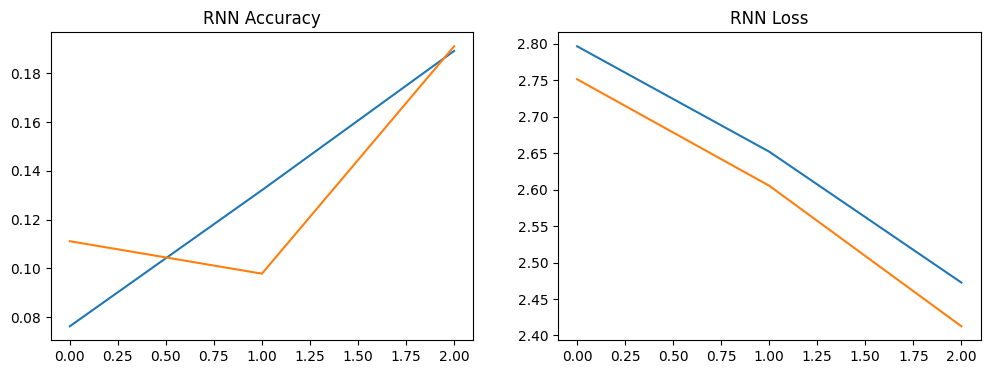

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Classification Report:
              precision    recall  f1-score   support

           .       0.00      0.00      0.00        24
          DT       0.12      0.02      0.04        46
          IN       0.25      0.03      0.06        29
          JJ       0.08      0.03      0.04        40
         JJR       0.00      0.00      0.00         4
          NN       0.22      0.44      0.30        79
         NNP       0.00      0.00      0.00         6
         NNS       0.00      0.00      0.00        17
         PRP       0.00      0.00      0.00        12
        PRP$       0.00      0.00      0.00         3
          TO       0.00      0.00      0.00         5
         VBD       0.03      0.20      0.05        20
         VBG       0.33      0.08      0.12        13
         VBP       0.00      0.00      0.00         5
         VBZ       0.00      0.00      0.00        11

    accuracy                           0.14       314
   macro avg       0

C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.1600 - loss: 2.7715 - val_accuracy: 0.1422 - val_loss: 2.7581
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.1371 - loss: 2.7543 - val_accuracy: 0.2622 - val_loss: 2.7390
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.1378 - loss: 2.7308 - val_accuracy: 0.2578 - val_loss: 2.7051


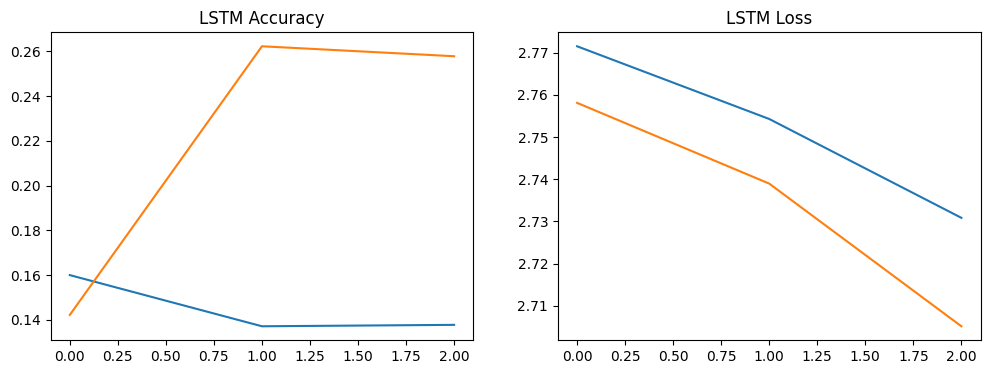

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Classification Report:
              precision    recall  f1-score   support

           .       0.00      0.00      0.00        24
          DT       0.00      0.00      0.00        46
          IN       0.00      0.00      0.00        29
          JJ       0.00      0.00      0.00        40
         JJR       0.00      0.00      0.00         4
          NN       0.25      1.00      0.41        79
         NNP       0.00      0.00      0.00         6
         NNS       0.00      0.00      0.00        17
         PRP       0.00      0.00      0.00        12
        PRP$       0.00      0.00      0.00         3
          TO       0.00      0.00      0.00         5
         VBD       0.00      0.00      0.00        20
         VBG       0.00      0.00      0.00        13
         VBP       0.00      0.00      0.00         5
         VBZ       0.00      0.00      0.00        11

    accuracy                           0.25       314
   macro avg       0

C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.0190 - loss: 2.7734 - val_accuracy: 0.2044 - val_loss: 2.7538
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.1473 - loss: 2.7544 - val_accuracy: 0.2667 - val_loss: 2.7311
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.1473 - loss: 2.7293 - val_accuracy: 0.2578 - val_loss: 2.6922


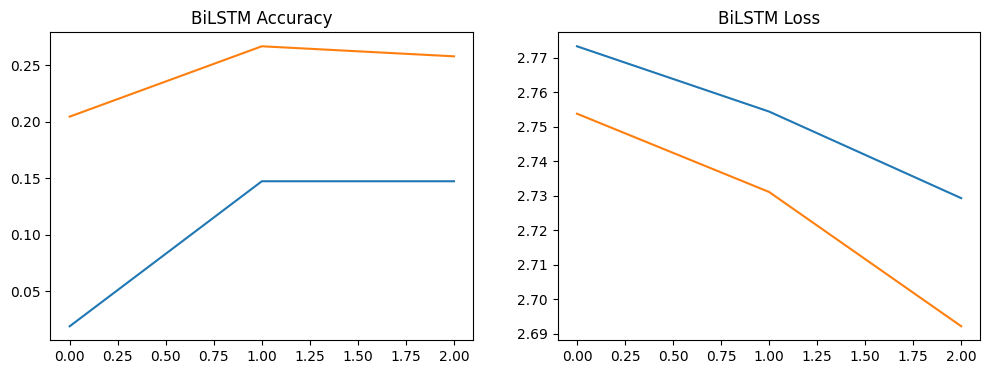

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Classification Report:
              precision    recall  f1-score   support

           .       0.00      0.00      0.00        24
          DT       0.00      0.00      0.00        46
          IN       0.00      0.00      0.00        29
          JJ       0.00      0.00      0.00        40
         JJR       0.00      0.00      0.00         4
          NN       0.25      1.00      0.40        79
         NNP       0.00      0.00      0.00         6
         NNS       0.00      0.00      0.00        17
         PRP       0.00      0.00      0.00        12
        PRP$       0.00      0.00      0.00         3
          TO       0.00      0.00      0.00         5
         VBD       0.00      0.00      0.00        20
         VBG       0.00      0.00      0.00        13
         VBP       0.00      0.00      0.00         5
         VBZ       0.00      0.00      0.00        11

    accuracy                           0.25       314
   macro avg       0

C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Predicted Tags:
The → IN
boy → IN
is → IN
playing → IN
football → IN


In [15]:
# ========================================================================
# POS TAGGING — FINAL WORKING VERSION (NO PAD PREDICTIONS)
# ========================================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, TimeDistributed, Dense


# ========================================================================
# 1. LOAD DATASET
# ========================================================================
df = pd.read_csv("pos_tagged_dataset.csv")
print(df.head())


# ========================================================================
# 2. GROUP WORDS & POS TAGS BY SENTENCE ID
# ========================================================================
sentences = df.groupby("sentence")["word"].apply(list)
tags = df.groupby("sentence")["pos_tag"].apply(list)

print("\nSample Sentence:", sentences.iloc[0])
print("Tags:", tags.iloc[0])


# ========================================================================
# 3. TOKENIZE WORDS
# ========================================================================
word_tokenizer = Tokenizer(oov_token="<OOV>")
word_tokenizer.fit_on_texts(sentences)

X = word_tokenizer.texts_to_sequences(sentences)
word_vocab = len(word_tokenizer.word_index) + 1


# ========================================================================
# 4. ENCODE POS TAGS (ADD PAD TAG — IMPORTANT)
# ========================================================================
all_tags = [t for row in tags for t in row]
all_tags.append("PAD")  # Pad tag added manually

tag_encoder = LabelEncoder()
tag_encoder.fit(all_tags)

y_encoded = tags.apply(lambda row: tag_encoder.transform(row))
num_tags = len(tag_encoder.classes_)

print("\nPOS TAGS:", tag_encoder.classes_)


# ========================================================================
# 5. PAD SEQUENCES
# ========================================================================
max_len = max(sentences.apply(len))

PAD_ID = tag_encoder.transform(["PAD"])[0]

X_padded = pad_sequences(X, maxlen=max_len, padding="post")
y_padded = pad_sequences(y_encoded, maxlen=max_len, padding="post", value=PAD_ID)


# ========================================================================
# 6. TRAIN–TEST SPLIT
# ========================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y_padded, test_size=0.2, random_state=42
)


# ========================================================================
# 7. MODEL BUILDER (RNN, LSTM, BiLSTM)
# ========================================================================
def build_pos_model(model_type):

    model = Sequential([
        Embedding(
            input_dim=word_vocab,
            output_dim=128,
            input_length=max_len,
            mask_zero=True    # ❤️ FIX FOR PAD PREDICTION ISSUE
        )
    ])

    if model_type == "RNN":
        model.add(SimpleRNN(256, return_sequences=True))

    elif model_type == "LSTM":
        model.add(LSTM(256, return_sequences=True))

    elif model_type == "BiLSTM":
        model.add(Bidirectional(LSTM(256, return_sequences=True)))

    # Output layer
    model.add(TimeDistributed(Dense(num_tags, activation="softmax")))

    return model


# ========================================================================
# 8. TRAIN MODEL FUNCTION
# ========================================================================
def train_model(model, name):

    print(f"\n=========== TRAINING {name} ===========")

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        X_train, y_train,
        epochs=3,
        batch_size=32,
        validation_split=0.1,
        verbose=1
    )

    # Graphs
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title(name + " Accuracy")

    plt.subplot(1,2,2)
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title(name + " Loss")
    plt.show()

    # Predictions
    y_pred = np.argmax(model.predict(X_test), axis=-1)

    # Remove PAD tokens before evaluation
    mask = y_test.flatten() != PAD_ID

    y_true = y_test.flatten()[mask]
    y_pred_f = y_pred.flatten()[mask]

    print("\nClassification Report:")
    print(classification_report(
        y_true,
        y_pred_f,
        target_names=[t for t in tag_encoder.classes_ if t != "PAD"]
    ))

    return model


# ========================================================================
# 9. TRAIN MODELS (RUN ANY ONE IN EXAM)
# ========================================================================
rnn_model = build_pos_model("RNN")
trained_rnn = train_model(rnn_model, "RNN")

lstm_model = build_pos_model("LSTM")
trained_lstm = train_model(lstm_model, "LSTM")

bilstm_model = build_pos_model("BiLSTM")
trained_bilstm = train_model(bilstm_model, "BiLSTM")


# ========================================================================
# 10. PREDICT POS TAGS FOR A SENTENCE
# ========================================================================
def predict_pos(sentence, model, name):

    print(f"\n[{name}] Prediction:")
    words = sentence.split()

    seq = word_tokenizer.texts_to_sequences([words])
    pad = pad_sequences(seq, maxlen=max_len)

    preds = np.argmax(model.predict(pad)[0], axis=-1)

    print("\nPredicted Tags:")
    for w, t in zip(words, preds[:len(words)]):
        print(w, "→", tag_encoder.inverse_transform([t])[0])


# TEST PREDICTION
predict_pos("The boy is playing football", trained_bilstm, "LSTM")


                                            sentence          word ner_tag
0  Microsoft partnered with OpenAI for AI develop...     Microsoft     ORG
1  Microsoft partnered with OpenAI for AI develop...        OpenAI     ORG
2             Barack Obama visited France last year.  Lionel Messi  PERSON
3             Barack Obama visited France last year.   Inter Miami     ORG
4             Google acquired a startup from London.      Olympics   EVENT

Sample Sentence: ['Apple Inc.', 'iPhone 15', 'California', 'Cristiano Ronaldo', 'Chelsea', 'Barack Obama', 'France', 'Elon Musk', 'Tesla', 'Berlin', 'Apple Inc.', 'iPhone 15', 'California', 'Google', 'London', 'Elon Musk', 'Tesla', 'Berlin', 'NASA', 'Cape Canaveral', 'Elon Musk', 'Tesla', 'Berlin', 'Olympics', 'Paris', 'Microsoft', 'OpenAI', 'Barack Obama', 'France', 'Lionel Messi', 'Inter Miami', 'Lionel Messi', 'Inter Miami', 'Cristiano Ronaldo', 'Chelsea', 'Elon Musk', 'Tesla', 'Berlin', 'Barack Obama', 'France', 'Lionel Messi', 'Inter Miam

C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1584 - loss: 1.8060 - val_accuracy: 0.2909 - val_loss: 1.6861
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3662 - loss: 1.6161 - val_accuracy: 0.4364 - val_loss: 1.4566
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4442 - loss: 1.4205 - val_accuracy: 0.6364 - val_loss: 1.3715


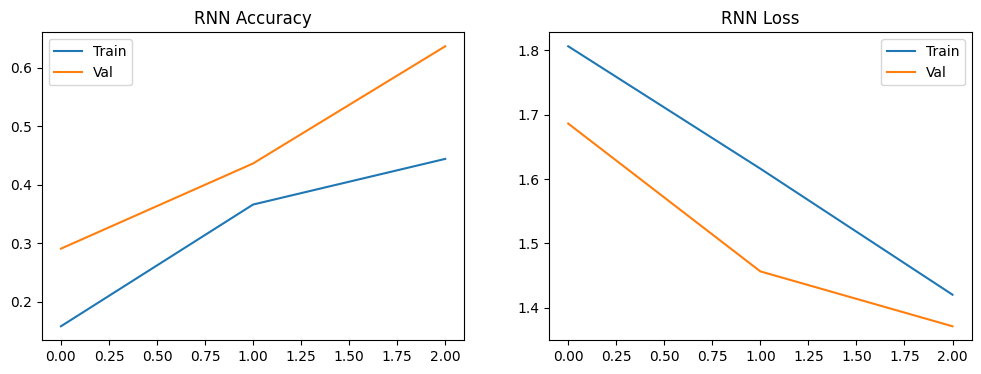

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step

Classification Report:
              precision    recall  f1-score   support

       EVENT       0.00      0.00      0.00         4
    LOCATION       0.70      0.84      0.76        31
         ORG       0.65      0.86      0.74        37
      PERSON       1.00      0.17      0.29        12
     PRODUCT       1.00      0.20      0.33         5

    accuracy                           0.69        89
   macro avg       0.67      0.41      0.43        89
weighted avg       0.71      0.69      0.63        89



C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

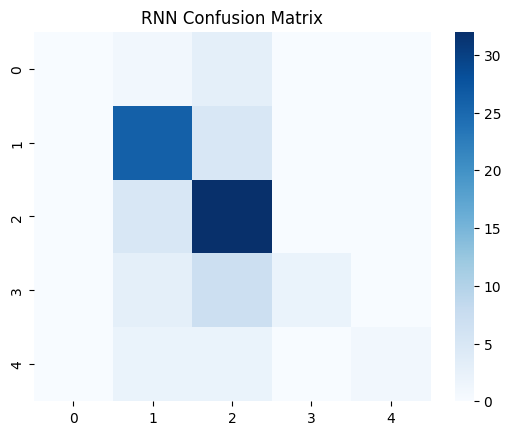


========== TRAINING LSTM ==========

Epoch 1/3


C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2026 - loss: 1.7935 - val_accuracy: 0.4727 - val_loss: 1.7720
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.3636 - loss: 1.7698 - val_accuracy: 0.5273 - val_loss: 1.7444
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.3974 - loss: 1.7431 - val_accuracy: 0.5091 - val_loss: 1.7049


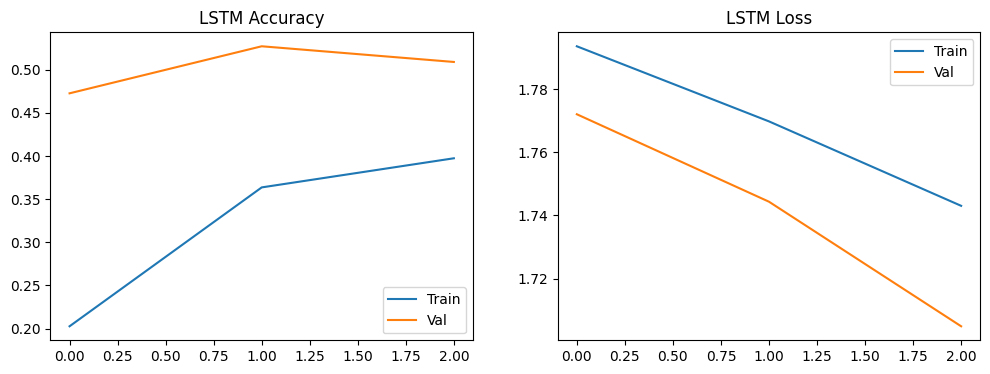

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step

Classification Report:
              precision    recall  f1-score   support

       EVENT       0.00      0.00      0.00         4
    LOCATION       0.49      0.81      0.61        31
         ORG       0.61      0.62      0.61        37
      PERSON       0.00      0.00      0.00        12
     PRODUCT       0.00      0.00      0.00         5

    accuracy                           0.54        89
   macro avg       0.22      0.29      0.24        89
weighted avg       0.42      0.54      0.47        89



C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

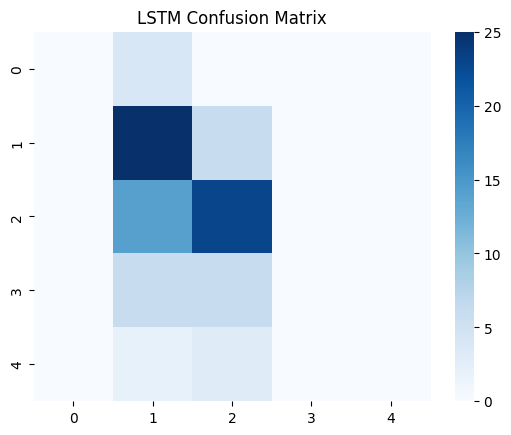


========== TRAINING BiLSTM ==========

Epoch 1/3


C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0961 - loss: 1.7924 - val_accuracy: 0.3636 - val_loss: 1.7606
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.3403 - loss: 1.7625 - val_accuracy: 0.4545 - val_loss: 1.7208
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.3610 - loss: 1.7260 - val_accuracy: 0.5091 - val_loss: 1.6594


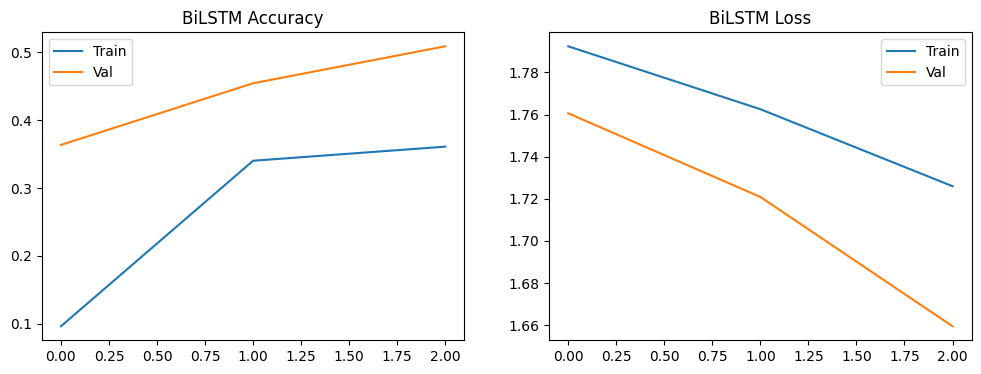

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step

Classification Report:
              precision    recall  f1-score   support

       EVENT       0.00      0.00      0.00         4
    LOCATION       0.61      0.35      0.45        31
         ORG       0.51      0.97      0.67        37
      PERSON       0.00      0.00      0.00        12
     PRODUCT       0.00      0.00      0.00         5

    accuracy                           0.53        89
   macro avg       0.22      0.27      0.22        89
weighted avg       0.42      0.53      0.43        89



C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

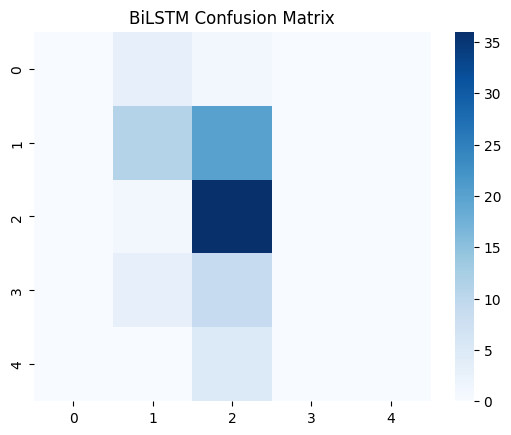


[BiLSTM] Prediction:
Sentence: John Smith lives in New York
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step

Predicted Tags:
John → PERSON
Smith → PERSON
lives → PERSON
in → PERSON
New → PERSON
York → PERSON


In [14]:
# ========================================================================
# NAMED ENTITY RECOGNITION (NER) — FIXED & ERROR-FREE VERSION
# ========================================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, TimeDistributed

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# ------------------------------------------------------------------------
# 1. LOAD NER DATASET
# ------------------------------------------------------------------------
df = pd.read_csv("ner_tagged_dataset.csv")
print(df.head())


# ------------------------------------------------------------------------
# 2. GROUP WORDS & TAGS BY SENTENCE ID
# ------------------------------------------------------------------------
sentences = df.groupby("sentence")["word"].apply(list)
tags = df.groupby("sentence")["ner_tag"].apply(list)

print("\nSample Sentence:", sentences.iloc[0])
print("Sample Tags:", tags.iloc[0])


# ------------------------------------------------------------------------
# 3. TOKENIZE WORDS
# ------------------------------------------------------------------------
word_tokenizer = Tokenizer(oov_token="<OOV>")
word_tokenizer.fit_on_texts(sentences)

X = word_tokenizer.texts_to_sequences(sentences)
word_vocab = len(word_tokenizer.word_index) + 1


# ------------------------------------------------------------------------
# 4. LABEL ENCODER WITH MANUAL PAD TAG (FIX)
# ------------------------------------------------------------------------
all_tags = [t for sub in tags for t in sub]
all_tags.append("PAD")      # <-- IMPORTANT FIX

tag_encoder = LabelEncoder()
tag_encoder.fit(all_tags)

y_encoded = tags.apply(lambda t: tag_encoder.transform(t))
tag_count = len(tag_encoder.classes_)

print("\nNER Tags:", tag_encoder.classes_)


# ------------------------------------------------------------------------
# 5. PAD WORDS & TAGS
# ------------------------------------------------------------------------
max_len = max(sentences.apply(len))

X_padded = pad_sequences(X, maxlen=max_len, padding="post")

pad_value = tag_encoder.transform(["PAD"])[0]

y_padded = pad_sequences(
    y_encoded, maxlen=max_len, padding="post", value=pad_value
)


# ------------------------------------------------------------------------
# 6. TRAIN–TEST SPLIT
# ------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y_padded, test_size=0.2, random_state=42
)


# ------------------------------------------------------------------------
# 7. TRAINING FUNCTION
# ------------------------------------------------------------------------
def train_model(model, name):

    print(f"\n========= Training {name} =========\n")

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        X_train, y_train,
        epochs=3,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Graphs
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title(name + " Accuracy")
    plt.legend(["Train","Val"])

    plt.subplot(1,2,2)
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title(name + " Loss")
    plt.legend(["Train","Val"])
    plt.show()

    # Predictions
    y_pred = np.argmax(model.predict(X_test), axis=-1)

    y_true_f = y_test.flatten()
    y_pred_f = y_pred.flatten()

    print("\nClassification Report:")
    print(classification_report(
        y_true_f, y_pred_f,
        target_names=tag_encoder.classes_
    ))

    cm = confusion_matrix(y_true_f, y_pred_f)
    sns.heatmap(cm, cmap="Blues")
    plt.title(name + " Confusion Matrix")
    plt.show()

    return model


# ------------------------------------------------------------------------
# 8. MODEL 1 — RNN
# ------------------------------------------------------------------------
rnn_model = Sequential([
    Embedding(word_vocab, 64, input_length=max_len),
    SimpleRNN(128, return_sequences=True),
    TimeDistributed(Dense(tag_count, activation="softmax"))
])

trained_rnn = train_model(rnn_model, "RNN")


# ------------------------------------------------------------------------
# 9. MODEL 2 — LSTM
# ------------------------------------------------------------------------
lstm_model = Sequential([
    Embedding(word_vocab, 64, input_length=max_len),
    LSTM(128, return_sequences=True),
    TimeDistributed(Dense(tag_count, activation="softmax"))
])

trained_lstm = train_model(lstm_model, "LSTM")


# ------------------------------------------------------------------------
# 10. MODEL 3 — BiLSTM
# ------------------------------------------------------------------------
bilstm_model = Sequential([
    Embedding(word_vocab, 64, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    TimeDistributed(Dense(tag_count, activation="softmax"))
])

trained_bilstm = train_model(bilstm_model, "BiLSTM")


# ------------------------------------------------------------------------
# 11. NER PREDICTION
# ------------------------------------------------------------------------
def predict_ner(sentence, model, name):
    print(f"\n[{name}]")
    words = sentence.split()

    seq = word_tokenizer.texts_to_sequences([words])
    pad = pad_sequences(seq, maxlen=max_len)

    preds = np.argmax(model.predict(pad)[0], axis=-1)

    print("Sentence:", sentence)
    print("Predicted Tags:")

    for w, tag in zip(words, preds[:len(words)]):
        print(w, "→", tag_encoder.inverse_transform([tag])[0])


predict_ner("John visited Paris last year", trained_bilstm, "LSTM")
